Accurate measurement of body fat is inconvenient/costly, and it is desirable to have easy
methods of predicting Body Fat. Using the given Body Fat dataset, build a Neural Network to predict
body fat. Plot the training and validation performance curves and analyze the performance of the
proposed neural network.
The attributes of the dataset are as follows:
1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)
Use the following hyperparameters/design choices for your neural network:
• Split the data in the ratio Training: Validation: Testing = 80:10:10.
• Perform Normalization using Standard Scalar.
• Number of Hidden layers = 3 and number of units for each hidden layers are
128,64,32, respectively.
• Use RELU activation function in the hidden layers, choose the optimizer as ADAM
and set learning rate to be equal to 0.1.

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('dataset_q2_bodyfat.csv')

df.head(5)


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [11]:
X = df.drop(columns=['BodyFat']).values
y = df['BodyFat'].values

In [12]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'Train size: {X_train.shape}, Val size: {X_val.shape}, Test size: {X_test.shape}')

Train size: (201, 14), Val size: (25, 14), Test size: (26, 14)


In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [14]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  
])

/home/student/miniconda3/envs/tf-gpu/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
optimizer = Adam(learning_rate=0.01)# learning rate  at0.1 there is a high loss so changed the loss to 0.01
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=16, verbose=2)

Epoch 1/100
13/13 - 3s - 205ms/step - loss: 234.1050 - mae: 12.5605 - val_loss: 111.7019 - val_mae: 7.4399
Epoch 2/100
13/13 - 0s - 6ms/step - loss: 50.3298 - mae: 5.6573 - val_loss: 54.9008 - val_mae: 4.4010
Epoch 3/100
13/13 - 0s - 6ms/step - loss: 19.7101 - mae: 3.5910 - val_loss: 13.0449 - val_mae: 2.5559
Epoch 4/100
13/13 - 0s - 6ms/step - loss: 11.9836 - mae: 2.7711 - val_loss: 20.9441 - val_mae: 3.1480
Epoch 5/100
13/13 - 0s - 5ms/step - loss: 8.9634 - mae: 2.3905 - val_loss: 9.8009 - val_mae: 2.1610
Epoch 6/100
13/13 - 0s - 5ms/step - loss: 4.8163 - mae: 1.7444 - val_loss: 4.7292 - val_mae: 1.6674
Epoch 7/100
13/13 - 0s - 5ms/step - loss: 3.0007 - mae: 1.3321 - val_loss: 2.8868 - val_mae: 1.2968
Epoch 8/100
13/13 - 0s - 6ms/step - loss: 2.2571 - mae: 1.1250 - val_loss: 2.4832 - val_mae: 1.1300
Epoch 9/100
13/13 - 0s - 5ms/step - loss: 1.7125 - mae: 0.9652 - val_loss: 2.1061 - val_mae: 1.1116
Epoch 10/100
13/13 - 0s - 6ms/step - loss: 1.3701 - mae: 0.8224 - val_loss: 1.2946 - va

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,869 (144.02 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,580 (96.02 KB)

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(test_loss,test_acc)

0.5882285833358765 0.5941653847694397


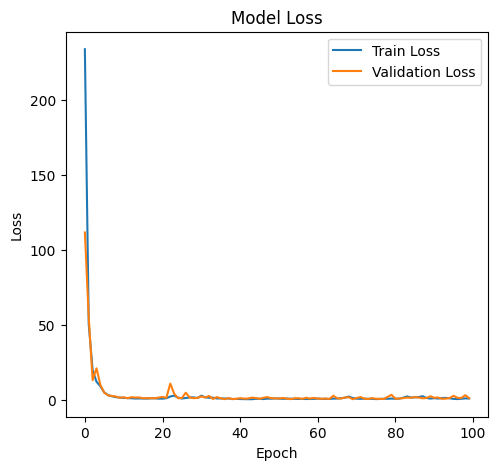

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()